# Names: Lorenzo Bujalil Silva (NetId: lorenzo9), Logan Cudia(NetId: llcudia2), Josh Cudia (NetId: cudia2) 


### Note: Many of the cells in this lab report will not run because they were copied over from our helper Raspberry Pi scripts, which include libraries such as tflite_runtime which we did not install on our PC.
### Important: All three of us demoed this lab with Junhao Pan in the 10 AM lab section, however we wanted to let you know Lorenzo Bujalil Silva has the 1 PM lab section with Gregory Jun while the Josh and Logan have the 10 AM lab.

ECE479ICC LAB 2: Raspberry Pi, TF-Keras, and Face Detection
====================================


## PART I: Raspberry Pi Setup and Basics

### Raspberry Pi Setup

From this lab on, you will apply what you have learned in the lectures to train and deploy a neural network on an edge device, Raspberry Pi 4.

Raspberry Pi 4 is an inexpensive but powerful IoT device. You may review this [report][raspberry_pi_history] to learn more about its story. To start, you need to install the proper Raspbian OS. If you are at home without a monitor, you can set up the OS with the headless option. The official Raspberry Pi documents with the headless option could be found [here][rpi_headless]. If you would like to use the SSH (Secure Shell) to connect to your Raspberry Pi, you can refer to this official [document][rpi_ssh].

Once your RPi can boot into the OS normally, you can enable the VNC and access the desktop environment using your laptop/desktop. You can follow the "Enabling and Connecting over VNC" section of the [tutorial][headless_rpi_start] for this.

Now that you have the desktop environment, follow this [guide][picam_start] to set up your pi-camera. You should be able to take pictures and videos with your camera.

[raspberry_pi_history]:https://www.techrepublic.com/article/inside-the-raspberry-pi-the-story-of-the-35-computer-that-changed-the-world/
[headless_rpi_start]: https://www.tomshardware.com/reviews/raspberry-pi-headless-setup-how-to,6028.html
[rpi_headless]:https://www.raspberrypi.com/documentation/computers/configuration.html#setting-up-a-headless-raspberry-pi
[rpi_ssh]:https://www.raspberrypi.com/documentation/computers/remote-access.html
[picam_start]:https://picamera.readthedocs.io/en/latest/
[headless_setup]:https://www.raspberrypi.org/documentation/remote-access/ssh/

In this part of the lab, you need to complete the following tasks: 

  * Install Raspbian OS in your Raspberry Pi, set up your network connection, and take a selfie on the pi-camera.
  * **Print** the CPU specs with `cat /proc/cpuinfo`
  * **Print** network interface configuration with `ifconfig`
  
  
### TensorFlow Setup on Raspberry Pi 

Once you can log into the Raspberry Pi desktop, please follow the [this_guide][tf_lite_install] and [this_guide][coral_setup] to install **TensorFlow Lite** on your Raspberry Pi and work with the accelerator.

After the installation. Please verify that the installation is properly done. By running
```Python
import tensorflow as tf
tf.__version__
```
in a python environment, notice the version number for your Tensorflow.

[tf_lite_install]:https://www.tensorflow.org/lite/guide/python
[coral_setup]:https://coral.ai/docs/accelerator/get-started/

### TensorFlow Setup on Your PC

Please follow the following commands in your conda environment to install **TensorFlow 2.10** on your own PC.
```
conda install -c conda-forge tensorflow=2.10
```
If you have a Apple Silicon Mac, please follow this [guide][tf_install]. It is a little more complicated.


After the installation. Please verify that the installation is properly done. By running
```Python
import tensorflow as tf
tf.__version__
```
in a python environment, notice the version number for your Tensorflow.

[tf_install]:https://towardsdatascience.com/installing-tensorflow-on-the-m1-mac-410bb36b776

## Selfie on Pi Camera
```Python
from picamera2 import Picamera2, Preview
import time
picam2 = Picamera2()
time.sleep(5)
picam2.start_and_capture_file("selfie.jpg")
```
![selfie](figures/selfie.jpeg)

## Print CPU Specs
### cat /proc/cpuinfo
![cpuinfo](figures/cpuinfo.jpeg)

## Print network interface configuration
### ifconfig
![ifconfig](figures/ifconfig.jpeg)

## PART II: Building and Training with TF-Keras

In part II, you will build a Convolutional Neural Network (CNN) based image classifier. In our lecture, we have introduced CNN, a type of Deep Neural Network (DNN) that features convolutional layers. This [document][cnn_definition] by Stanford CS231n is also a good resource to learn more about CNN. You will build and train a simple CNN with TensorFlow on your own computers.

[cnn_definition]:http://cs231n.github.io/convolutional-networks/

There were two ways to construct and train a neural network model in TF1.x: Keras and low-level APIs. As Tensorflow evolves to 2.x, it leans more toward Keras, a higher-level framework than the previous version's low-level APIs. Keras APIs provide straightforward construction and training of neural networks, which hide away some tedious details of the network. 

Some may argue that low-level APIs provide more precise control over some aspects of the network. While users can still find a way to tune the details by looking deeper into the APIs, the framework encourages them to focus on the big picture and develop better and more robust network models rather than fixating on trivialities. As a beginner, it is helpful for us to start with Keras and establish a basic intuition on how to build and train a simple network.

In this part of the lab, you need to follow this [tutorial][fashion_mnist] to build a neural network to classify the Fashion MNIST dataset.

[fashion_mnist]:https://www.tensorflow.org/tutorials/keras/classification



### FashionNet

You will construct a neural network by yourselves. Let's call it the FashionNet. Here is an overview of the proposed Convolutional Neurual Network (CNN):

![cnn_img](figures/fashionnet.png)

This CNN contains two convolutional layers, two max pooling layers, and three fully connected layers (dense layers). The configuration details of each layer are shown in the following table (in sequential order):

| Layers          | Configuration                        | Activation | Output Dimensions |
|---------------:|--------------------------------------:|-------------------:|----------------------------------------: |
| convolution     | input size = (28, 28, 1), kernel size = (5, 5), stride = 1, padding = 'same'   |       ReLU          |            (28, 28, 4)                     |
| max pooling     | pool_size = (2, 2), stride = 2                           |       -             |            (14, 14, 4)                     |
| convolution     | kernel size = (3, 3), stride = 1, padding = 'valid'|       ReLU          |            (12, 12, 8)                     |
| max pooling     | pool_size = (2, 2), stride = 2                           |       -             |            (6, 6, 8)                       |
| dense |       |       ReLU          |            (128)                     |
| dense |        |       ReLU          |            (64)                      |
| dense |         |       Softmax       |            (10)                      |


### Dataset
In this lab, you will use the Fashion MNIST dataset. You can load the dataset in the following way, which is also shown in the tutorial:
```Python
import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
```
As discussed in the lecture, you should only use `train_images` and `train_labels` to train your model. You may also want to validate your model with a training/validation split. We will discuss the details in the next section.

### Build, Train, and Evaluate
Generally, there are three stages in the process of developing a neural network: build, train, and evaluate. In Keras, there are corresponding functions for each stage:

1. **Build** First, you define the model architecture. In this lab, you can use a simple `keras.Sequential` function to define a model, as shown in this [example][sequential]. There are other ways to define a model, but we will not discuss those in this lab. After you have defined your model, you need to tell Keras what you want to do with it by compiling it. In the `model.compile` function, you specify the optimizer, loss function, metrics, and other configurations to prepare for training.
2. **Train** You use `model.fit` function to train your model. In this function, you can specify the training parameters, including batch size, epochs, etc. You should specify your validation split in this function too. Please refer to the document and see how to do that.
3. **Evaluate** After you have trained your model, you need to test the final accuracy using the testing data. The `model.evaluate` function gives you the percentage of the correct results. 

You can find the document for the above functions [here][fit_api].
You may also find that in FashionNet, you use 2-D convolution in the first couple of layers. You may find [this document][layer_api] helpful since the `layers.Conv2D` and `layers.MaxPool2D` functions are not covered in the tutorial.

The training of this CNN should not take a very long time on a laptop/desktop CPU. The final testing accuracy should be higher than 85%, and the training accuracy should be higher than 90%.


### Plot the Training Progress
The `model.fit` function outputs a history of the training metrics (accuracy and loss), including validation metrics. This infomation can be very helpful for diagnosing the model.

**Use `matplotlib` to graph the model accuracy and loss on the training and validation dataset, and include them in your report.** The graph should look something like the following, but yours can be different if you have different configurations of the training process.

![train_img](figures/train.png)

### Saving Your Trained Model
Finally, you will need to save your trained models to model files. Saving a trained model allows you to deploy it to other devices or restore previous training progress at a later time. 

For the purpose of this lab, we ask you to save it using **the TensorFlow SavedModel format**, which will contain the information of the model as well as the weights.

```Python
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
your_trained_model.save("my_model")
```

Please read [this document][save_model] to learn more about how the model save works in tensorflow.

[build_tag]:https://www.tensorflow.org/tutorials/keras/classification#build_the_model
[train_tag]:https://www.tensorflow.org/tutorials/keras/classification#train_the_model
[eval_tag]:https://www.tensorflow.org/tutorials/keras/classification#evaluate_accuracy
[sequential]:https://www.tensorflow.org/guide/keras/sequential_model#when_to_use_a_sequential_model


[fit_api]:https://keras.io/api/models/model_training_apis/
[layer_api]:https://www.tensorflow.org/api_docs/python/tf/keras/layers
[save_model]:https://www.tensorflow.org/guide/keras/save_and_serialize#what_the_savedmodel_contains

In [ ]:
# The following set of code until the model is saved references this tutorial: 
# https://www.tensorflow.org/tutorials/keras/classification. Many of the visualizations were kept
# in the notebook to analyze the accuracy of the model, however the implementation of the model in the 
# tutorial was changed to the fashion net model which has more complexity.
# You can see the changes reflected mainly when building the model using keras sequential.

In [13]:
# TensorFlow and tf.keras
import os
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # Prints out the current tensorflow version
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))# Prints out the number of GPUs available to potenital be used to accelrate learning.

2.10.0
Num GPUs Available:  0


In [14]:
# TODO:
# 1. Load Fashion MNIST dataset
# In order to start we needed to load the data using the keras datasets library. 
# This provides with a effective solution to store the data in a numpy array which is compatible
# with the model training and testing. 
import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [15]:
# References: 
# 1. https://www.tensorflow.org/api_docs/python/tf/keras/datasets
# 2. https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [16]:
# 2. Build, Train, and Evaluate
# Here we are storing the names of each of the classes in the dataset for ease of use later when 
# visualizing data later.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# VISUALIZING DATA
# It is very important to know what are the dimensions of the input data. 
# This is because neural networks heavily depends on matrix multiplication. If the input is not the correct
# dimension then errors may be thrown when multiplying matricies with mismatched dimensions. This prevents 
# from forward propagation of the network. Below, we are visualizing the
# data shape.

# 60000 images for training
# 10000 images for testing
print(train_images.shape) # 60000 images, 28x28 images
print(train_labels.shape) # 60000 labels
print(len(train_labels))# 60000 labels
print(train_labels)# each label is an integer between 0 and 9 
print(test_images.shape)# 10000 images, 28x28 images
print(len(test_labels))# 10000 labels

# We now know what input shape to use when defining our model.

(60000, 28, 28)
(60000,)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


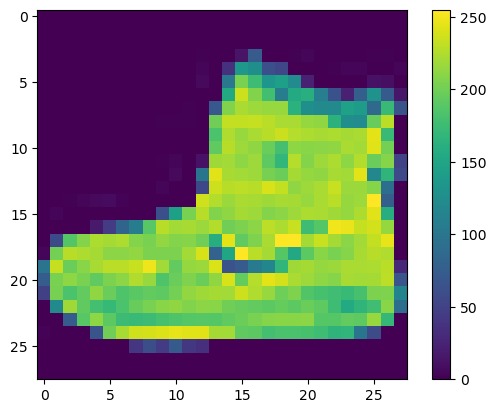

In [17]:
# PREPROCESSING DATA

# This is a quick visualization of one of the training images with a colorbar. 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# IMPORTANT: Normalizing data at sometimes improves calculation speed, but it is important to consider 
# if necessary when taking steps to apply post training quantization
# in this labs case we are applying a full-integer quantization, and if we normalize our dataset then 
# we will encounter problems with the accuracy of the model. This means that
# we will need to un normalize the images before testing that model. Full integer quantization predicts 
# the max and min values, and requires integers on the model to optimize
# the model.

# Scale values to the range of 0 to 1 before feeding them into the neural network model
train_images = train_images/255.0
test_images = test_images/255.0



In [18]:
# Saving the test images in order to test the tflite models on the Raspberry Pi
np.save('test_images.npy', test_images)
np.save('test_labels.npy', test_labels)


In [19]:
# References:
# 1. https://numpy.org/doc/stable/reference/generated/numpy.save.html

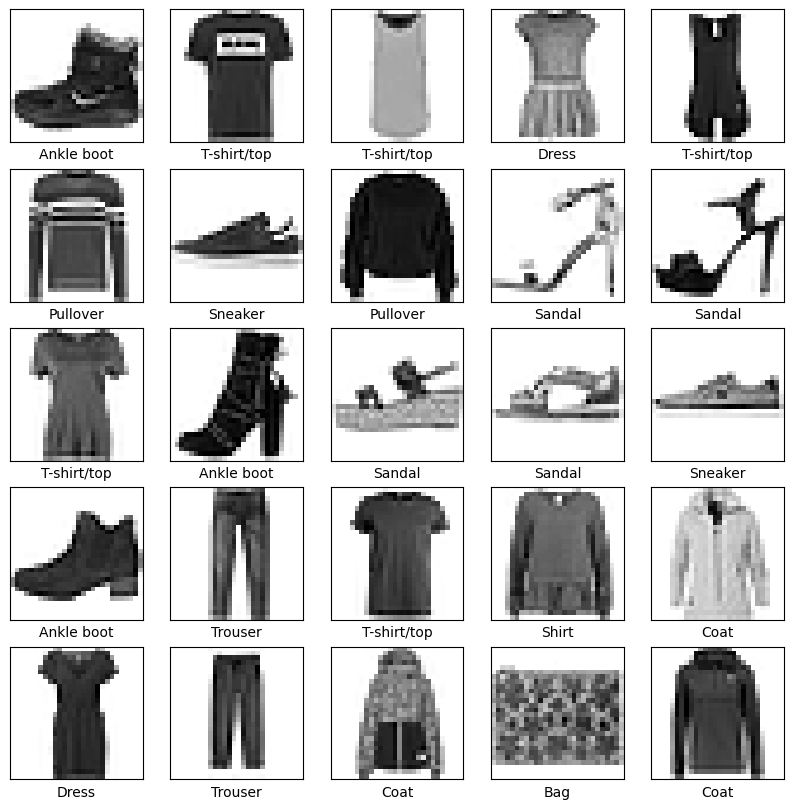

In [20]:
# Additional data visualization

# Display first 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


| Layers          | Configuration                        | Activation | Output Dimensions |
|---------------:|--------------------------------------:|-------------------:|----------------------------------------: |
| convolution     | input size = (28, 28, 1), kernel size = (5, 5), stride = 1, padding = 'same'   |       ReLU          |            (28, 28, 4)                     |
| max pooling     | pool_size = (2, 2), stride = 2                           |       -             |            (14, 14, 4)                     |
| convolution     | kernel size = (3, 3), stride = 1, padding = 'valid'|       ReLU          |            (12, 12, 8)                     |
| max pooling     | pool_size = (2, 2), stride = 2                           |       -             |            (6, 6, 8)                       |
| dense |       |       ReLU          |            (128)                     |
| dense |        |       ReLU          |            (64)                      |
| dense |         |       Softmax       |            (10)                      |



In [21]:
# BUILDING MODEL

# At this point we are building the FashionNet model. We used the table above to provide the appropriate 
# parameters for the model. We also referenced the keras layers library
# to understand the parameters required for each of the different layers. We also used the keras sequential 
# function to understand how to connect different layers for this model. 
# Certain layers in the model have requirements that others do not, such as the first convolution layer requires 
# a specification of the initial input shape. Then the model will
# comprehend the next layers depending on the operation done with the specific parameters. The configuration 
# and activation columns provided me with the appropriate parameters
# to be used at each point in the layer, but it took us a bit more time to analyze the model to specify 
# parameters such as filter size in the conv2d, or units in the dense layers.
# In order to determine these values we looked at the output dimensions, to see what size we should have 
# after each layer. The final dimension of the output gave us our filter size,
# and the only value in the dimension of the dense layers allowed us to determine the unit size. We also 
# needed to incorporate a flatten layer in order to condense the max pooling
# layer output to one dimension. This was the only way in order to get the dense layers to fully connect, 
# and work appropriately. 
 
model  = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4,kernel_size=(5,5),strides = 1, padding="same",activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides = 2),
    tf.keras.layers.Conv2D(8,kernel_size=(3,3),strides=1,padding="valid",activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides = 2),
    tf.keras.layers.Flatten(input_shape=(6, 6)),
    tf.keras.layers.Dense(128,activation='relu'), 
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10)
])

# After the model was implemented, we printed the summary of the model and it matched up with the table provided. 
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 4)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 128)               3

2023-03-28 13:40:54.438174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# References:
# 1. https://www.tensorflow.org/api_docs/python/tf/keras/layers
# 2. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential


In [23]:
# Compile the model
# The parameters for this model were sourced from the tutorial, and other parameters may be changed out 
# depending on the preferences of user and the necessities of the model.
# In this case, these parameters provided us with an appropriate accuracy.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
# Optimizer updates the model based on data and loss function

# Metrics is used to monitor the training and testing steps, in this case it uses accuracy
# on correct guesses to train the model

# Loss function measures the accuracy of the model and will be minized to steer model in the correct direction


In [24]:
# References:
# 1. https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

In [26]:
# TRAIN THE MODEL

# In this step we are training the model accoring to the training images. We also needed to specifiy a 
# number of epochs to train the model, and a value to split the data for
# for validation data. Without the validation split, the data was split into 85% training, and 15% testing. 
# We decided to use a 15% validation split because it balanced underfitting
# and overfitting the data. We achieved the necessary accuracy levels when we used this validation split. 
# We also intally used 15 epochs to train the model, but we realized that
# it was not enough in order to train the model. We were not reaching the appropriate accuracy levels. 
# Therefore we continously increased the epochs to reach that value.
# However after reviewing the data, it may have been beneficial to stop between 15 and 20 since the the model 
# loss in the validation set began to increase which is a sign that the
# model is overfitting to the data.

history = model.fit(train_images, train_labels, epochs=30, validation_split=0.15) # fits the model to the training data

# As you can see from the final output, the model achieves an accuracy of 97% on the training images

Epoch 1/30
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5303 - accuracy: 0.8088 - val_loss: 0.3999 - val_accuracy: 0.8573
Epoch 2/30
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3616 - accuracy: 0.8704 - val_loss: 0.3371 - val_accuracy: 0.8752
Epoch 3/30
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3159 - accuracy: 0.8849 - val_loss: 0.3322 - val_accuracy: 0.8811
Epoch 4/30
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2893 - accuracy: 0.8926 - val_loss: 0.2919 - val_accuracy: 0.8924
Epoch 5/30
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2690 - accuracy: 0.9011 - val_loss: 0.2964 - val_accuracy: 0.8937
Epoch 6/30
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2535 - accuracy: 0.9060 - val_loss: 0.2855 - val_accuracy: 0.8959
Epoch 7/30
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2400 - accuracy: 0.9103 - val_loss: 0.2831 - val_accuracy:

In [27]:
# References: 
# 1. https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


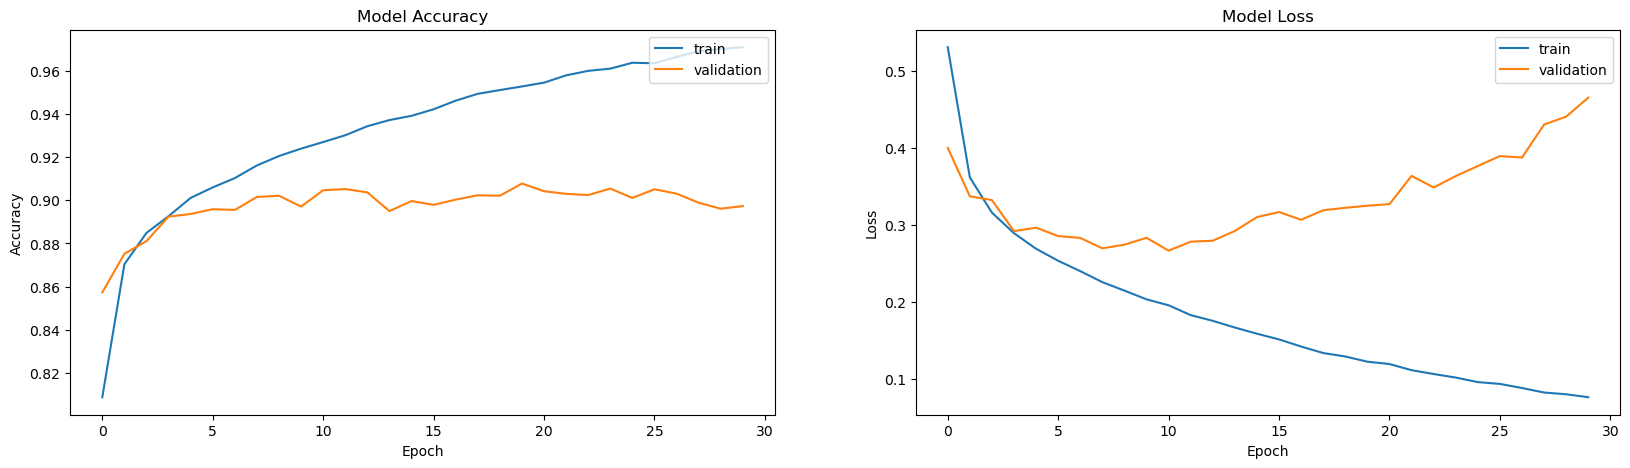

In [28]:
# Graphing Accuracy and loss
# The model has a key indicators that show how the model accuracy and loss changed over the epochs
# We are using these keys in order to display the results of the training.

print(history.history.keys())# Printed out the model keys in order to use to graph loss and accuracy.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')

In [30]:
# References: 
# 1. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# 2. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# 3. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [31]:
# Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Here we are testing to see how the model will generalize new images. As a result, the model 
# classified 89% of the images correctly which is in the acceptable range of accuracy. The
# evaluate function will run the model on the new testing images.

313/313 - 0s - loss: 0.4960 - accuracy: 0.8908 - 404ms/epoch - 1ms/step

Test accuracy: 0.8907999992370605


In [32]:
# Making Predictions
# Adding a softmax layer to convert the models linear outputs to probablities 
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [33]:
predictions[0] # Printing probabilities for the testing image

array([3.1783580e-09, 5.2347536e-16, 1.3829230e-14, 4.6803455e-12,
       1.9228367e-16, 9.4899888e-06, 3.7175095e-08, 6.5694592e-05,
       1.4298997e-11, 9.9992478e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])# Printing the index with the largest probability for classification

9

In [35]:
test_labels[0] # Comparing label data to predicted label

9

In [36]:
# As you can see from the two cells above, the testing label and prediction for the first testing
# image is the same. This is a small example to show that the model is working appropriately and
# making accurate classifications.

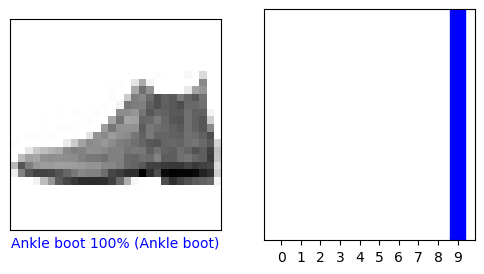

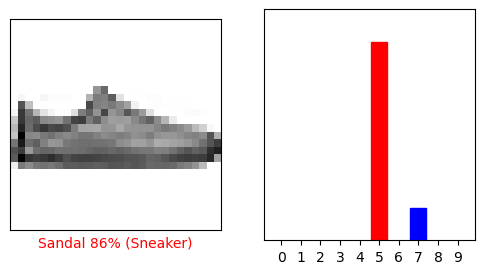

In [37]:
# Graphing to view the full set of 10 class predictions
# This code was sourced from the tutorial we needed to follow for this section and helps
# us visualize the models accuracy. As you can see from the images, the model was able to 
# easily identify an ankle boot with 100% certainty, but was unable to classify the sneaker.
# This leaves us with the question to change some parameters when initally training the model.
# Potentially lowering the number of epochs or changing the validation split. In any case, 
# there is room for improvement, but this model is classifying most images correctly. It still
# needs to be able to generalize more images and get closer to the training images accuracy.

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color ='blue'
    else:
        color ='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [38]:
# References: 
# 1. https://www.tensorflow.org/tutorials/keras/classification

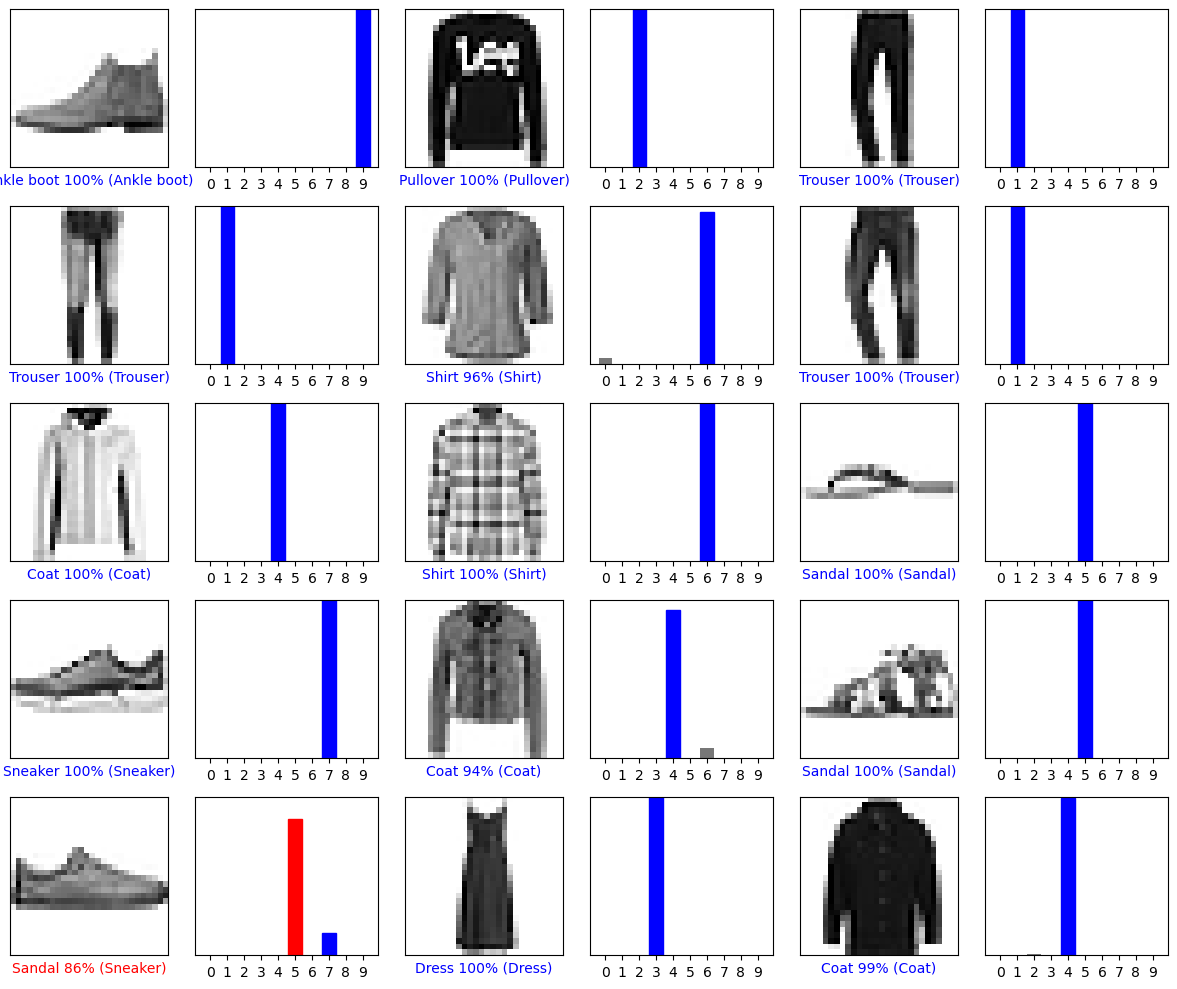

In [39]:
# Plotting several images with their predictions
# Correct = blue, Incorrect = red
# This code was also sourced from the tutorial for this section and provides us with in array
# of images and their classifcation confidence. As we mentioned before the model was able to 
# classify most images correctly with high certainty. 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [40]:
# References: 
# 1. https://www.tensorflow.org/tutorials/keras/classification

1/1 [==============================] - 0s 17ms/step
[[7.3257507e-07 1.6925451e-24 9.9954271e-01 3.5971715e-15 1.7015852e-13
  5.0262643e-24 4.5654835e-04 2.0553587e-25 1.4050548e-16 8.5275011e-21]]
2


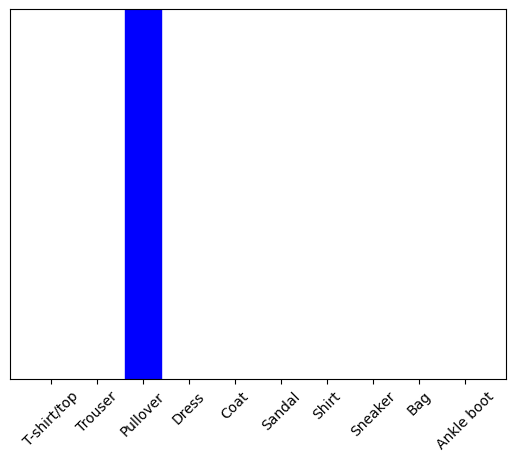

In [41]:
# Making prediction about a singular image
# This section is a final validation portion that make a prediction on a singular image
# and prints out its classification confidence for that image. 
# This code was also sourced from the tutorial for this section.

# Using the trained model

img = test_images[1]
#print(img.shape)

# Must extend the dimensions of the image since the model we are using works on a batch of images
img = (np.expand_dims(img,0))
#print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
print(np.argmax(predictions_single[0]))
plt.show()


In [42]:
# References: 
# 1. https://www.tensorflow.org/tutorials/keras/classification

In [43]:
# 3. Save Model
# In this final section, we are saving the model to be used later on when we are converting
# the model to the tflite version. 
model.save("cnn_model")

INFO:tensorflow:Assets written to: cnn_model/assets


INFO:tensorflow:Assets written to: cnn_model/assets


### Convert Your Trained Model to TFLite model

Before you start the migration process of your trained model onto our edge devices, Raspberry Pi 4, please make sure you have followed the previous steps carefully and have a properly trained TF model with reasonable accuracy on the validation dataset.

Now, locate the directory where your trained model files are saved and create a TFLite converter ready for the next step. 

Please refer to [this document][tf_lite_converter] for more information on the TFLite model.

[tf_lite_converter]:https://www.tensorflow.org/lite/api_docs/python/tf/lite/TFLiteConverter#from_saved_model

In [47]:
# TODO: Convert to TFLite
# In this step, we are converting the previously saved model into tflite so that it can be
# run on our Raspberry Pi. We are using the TFLiteConverter to convert this model.
# I am then writing this converted model to the directory to be used in the RPI4. 
converter = tf.lite.TFLiteConverter.from_saved_model("/Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model")
tflite_model = converter.convert()
open("converted_model.tflite","wb").write(tflite_model)

2023-03-28 14:56:55.587573: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-28 14:56:55.587593: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-03-28 14:56:55.587699: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
2023-03-28 14:56:55.589092: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-03-28 14:56:55.589100: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
2023-03-28 14:56:55.593431: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-03-28 14:56:55.645152: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
20

188812

In [48]:
# References: 
# 1. ECE 479 Lecture 11, Slide 7
# 2. https://www.tensorflow.org/lite/api_docs/python/tf/lite/TFLiteConverter#from_saved_model

### Optimize your TFLite model with post-trainning quantization
With the converter, we can directly transform our model to TFLite model; however, edge and IoT devices are usually low-powered and relatively lack computational power compared to PC. Therefore, to further enhance the performance, you can apply the post-training quantization technique before deploying the model onto the Raspberry Pi.

Notice that, although the post-training quantization is similar to the quantization and retrain technique that we will introduce in Lecture 12, since the model will not be retrained after the quantization, the impact on the accuracy of the model is usually larger.

In this part, you will need to apply two quantization methods, namely, **Dynamic range quantization** and **Full integer quantization**, listed in [this document][post-trainning quantization] to your pre-trained models and compare the accuracy and performance.

1) For dynamic range quantization, quantization parameters are automatically detected and generated by TensorFlow. Please write a piece of code to convert your original trained model into a TFLite model using dynamic range quantization.  

2) For integer quantization, TensorFlow needs to sample the dataset you used for training the models to estimate the **MIN** and **MAX** values. This process can be described as "representative data generation". An example representative data generator is
```Python
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(trainning_dataset).batch(1).take(100):
    yield [input_value]
```

You will need to define your own representative data generator function and properly select the following parameters as below:
```Python
# dataset used for training
trainning_set
# batch number x
.batch(x)
# input y
.take(y)
```

Please refer to this [official document][from_tensor_slices] for explanations on the **from_tensor_slices()** API. On the same page, you will also learn about how the TensorFlow ***tf.Data.Dataset*** format works.

[from_tensor_slices]:https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices
[post-trainning quantization]:https://www.tensorflow.org/lite/performance/post_training_quantization

In [49]:
# TODO:
# 1. Dynamic range quantization
# For the dynamic range quantization, we loaded the model as before with the TFLiteConverter.
# Then we applied an optimization to reduce memory usage and allow for faster computation.
# This quantization provides 8-bits of precision.

dynamic_converter = tf.lite.TFLiteConverter.from_saved_model("/Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model")


dynamic_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model_dyn = dynamic_converter.convert()
open("dynamic_converted_model.tflite","wb").write(tflite_quant_model_dyn)


2023-03-28 15:08:22.461715: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-28 15:08:22.461730: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-03-28 15:08:22.461837: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
2023-03-28 15:08:22.463169: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-03-28 15:08:22.463182: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
2023-03-28 15:08:22.467292: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-03-28 15:08:22.520119: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
20

53752

In [50]:
# References: 
# 1. ECE 479 Lecture 12, Slide 14
# 2. https://www.tensorflow.org/lite/performance/post_training_quantization

In [51]:
# TODO:
# 2. Full integer quantization
# We applied the full integer quantization model which provides lower latency, reducitons in
# memory usage, and is integer quantized. Before looping through the dataset and picking
# representatives, we needed to expand the dimension size of the training images in order to
# specify a batch size. Errors will occur with dimension sizing if this expansion is not done.
# After looping through the images, we did the same steps as before with using the TFLiteConverter
# to load the saved model, apply the optimizations. For this quantization we need to set up
# a quantization scheme but specifying suppported ops and the input/output type which needs
# be a uint8, to cover the full range.

import numpy as np
train_images_expanded = np.expand_dims(train_images, axis=3)

def representative_dataset():
    for data in tf.data.Dataset.from_tensor_slices(train_images_expanded).batch(1).take(100):
        yield [tf.dtypes.cast(data,tf.float32)]

# Get saved model, instantiate the converter
representative_converter = tf.lite.TFLiteConverter.from_saved_model("/Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model")
representative_converter.optimizations = [tf.lite.Optimize.DEFAULT]
#Specifiy the representative dataset
representative_converter.representative_dataset = representative_dataset
#Setup quantization scheme
representative_converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
representative_converter.inference_input_type = tf.uint8
representative_converter.inference_output_type = tf.uint8



tflite_quant_model_rep = representative_converter.convert()
open("representative_converted_model.tflite","wb").write(tflite_quant_model_rep)

2023-03-28 15:19:21.927703: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-28 15:19:21.927722: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-03-28 15:19:21.927837: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
2023-03-28 15:19:21.929132: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-03-28 15:19:21.929140: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
2023-03-28 15:19:21.933410: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-03-28 15:19:21.984569: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/cnn_model
20

51808

In [52]:
# References: 
# 1. ECE 479 Lecture 12, Slide 15
# 2. https://www.tensorflow.org/lite/performance/post_training_quantization

### Save and deploy your TFLite model
Save your converted TFLite models as binary files. Example code:
```Python
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)
```

To run execute the TFLite model on the RPi, you can refer to [this example][TFLite] for the details. In general, the following code is the standard process.
#### Step 1: load the model and allocate the tensors
We first need to instantiate the model with the TFLite model file, and then allocate all the tensors.
```Python
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()
```
#### Step 2: Check input and output info
To get the input and output tensor's names and their corresponding sizes, we will first need do the following steps to extract these information.
```Python
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
```
#### Step 3: Set input tensor and run the model
Once we got the input tensor's name and shape, we can then set the input tensor and run the model.
```Python
# Test the model on random input data.
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the model
interpreter.invoke()
```
#### Step 4: Extract the output tensor
We can finally run the `get_tensor(...)` function again to extract the output.
```Python
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
```
Once you confirm that the model is deployable on your RPi, you are ready to use the Coral Edge TPU to accelerate your computing. Please follow this [tutorial][TPU] to run your converted TFLite model on your Raspberry Pi with the Edge TPU.

**Please convert your model with these two different methods and report their corresponding accuracy and inference time with the TFLite model on the RPi with and without the Edge TPU. Compare and comment on what you observed in the report.**

[TFLite]:https://www.tensorflow.org/lite/guide/inference#load_and_run_a_model_in_python
[TPU]:https://coral.ai/docs/accelerator/get-started/#3-run-a-model-on-the-edge-tpu

In [54]:
import time # importing time to print time
# For all of the following steps until part 3 followed a similar pattern, and all have similar
# code. Essentially we followed the steps given above to convert the model save and deploy the
# tflite model. The only difference is that we implemented a loop to iterate through the testing
# images, we expanded the dimension the testing images to fit into the model input (correct batch
# size), changed the type of the data appropriately for each model, and compared the output data
# with the label data to create an accuracy of the model. 

# For the models that needed to be run on the Raspberry Pi, we did not use the tf.lite.Interpreter, 
# and instead used tflite_runtime.interpreter library to load the model. Everything else is the same

# Finally, for the models that were run on the Raspberry Pi and used the coral, we just changed
# one line from the code previously used on the Pi. We added this parameter, 
# experimental_delegates=[tflite.load_delegate('libedgetpu.so.1')], to the interperter in order
# to allocate resources to the coral and speed up computation. 

In [59]:
# Full Integer Quantization on PC
# In the full integer, we did one more thing to the steps above which was to unnormalize the data
# so the model will work appropriately. 
interpreter = tf.lite.Interpreter(model_path="representative_converted_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape'] 
start = time.time() #starting the time
counter =0
test_images_unnormalized=test_images*255.0 # unnormalizing the data
for i in range(10000): # looping through testing images
    test_images_reshaped = np.expand_dims(test_images_unnormalized, axis=3)# expanding the dimension
    # of the testing images
    test_images_reshaped = test_images_reshaped[i:i+1]# choosing one image at a time

    test_images_reshaped_float32 = test_images_reshaped.astype('uint8')# changing the data type

    interpreter.set_tensor(input_details[0]['index'], test_images_reshaped_float32)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])# attaining output data
    predicted_class = np.argmax(output_data)
    if(predicted_class==test_labels[i]):
        counter+=1 # if classified correctly increment counter
end = time.time()
print(f'{counter/10000 * 100}% Accurate\nTime Taken: {end-start} seconds')#prints accuracy

88.92% Accurate
Time Taken: 5.877351760864258 seconds


In [60]:
# Full Integer Quantization on Raspberry Pi
# DO NOT RUN WONT COMPILE WITH TFLITE_RUNTIME
import time
import tflite_runtime.interpreter as tflite #imported a new library, tflite_runtime to
# load the models
import numpy as np

interpreter = tflite.Interpreter(model_path="representative_converted_model.tflite") # This
# is the only line that was changed in order to run the RPi, refer to comments above
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
start = time.time()

test_images = np.load("test_images.npy")# loading the testing images and labels
test_images*=255.0
test_labels = np.load("test_labels.npy")
counter =0

for i in range(10000):
	test_images_reshaped = np.expand_dims(test_images,axis=3)
	test_images_reshaped = test_images_reshaped[i:i+1]
	
	
	test_images_reshaped_float32 = test_images_reshaped.astype('uint8')
	interpreter.set_tensor(input_details[0]['index'],test_images_reshaped_float32)
	interpreter.invoke()
	output_data = interpreter.get_tensor(output_details[0]['index'])
	predicted_class = np.argmax(output_data)
	if(predicted_class==test_labels[i]):
		counter+=1
end=time.time()
print(f'{counter/10000*100}% Accurate\nTime Taken:{end-start}')

	

In [58]:
# Full Integer Quantization with Edge TPU on Raspberry Pi
# DO NOT RUN WONT COMPILE WITH TFLITE_RUNTIME
import time
import tflite_runtime.interpreter as tflite
import numpy as np

# Added the experimental delegates parameter in order to load computational power from 
# the coral in order to speed up calculations. Only changed this line.

interpreter = tflite.Interpreter(model_path="representative_converted_model.tflite",experimental_delegates=[tflite.load_delegate('libedgetpu.so.1')])
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
start = time.time()

test_images = np.load("test_images.npy")# loading the testing images and labels
test_images*=255.0
test_labels = np.load("test_labels.npy")# loading the testing images and labels
counter =0

for i in range(10000):
	test_images_reshaped = np.expand_dims(test_images,axis=3)
	test_images_reshaped = test_images_reshaped[i:i+1]
	
	
	test_images_reshaped_float32 = test_images_reshaped.astype('uint8')
	interpreter.set_tensor(input_details[0]['index'],test_images_reshaped_float32)
	interpreter.invoke()
	output_data = interpreter.get_tensor(output_details[0]['index'])
	predicted_class = np.argmax(output_data)
	if(predicted_class==test_labels[i]):
		counter+=1
end=time.time()
print(f'{counter/10000*100}% Accurate\nTime Taken:{end-start}')

	

In [61]:
# Dynamic Quantization on PC
interpreter = tf.lite.Interpreter(model_path="dynamic_converted_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
start = time.time()# starting the time
counter =0

for i in range(10000):# iteating through the testing images
    test_images_reshaped = np.expand_dims(test_images, axis=3)#expanding dimensions to specify
    # batch size
    test_images_reshaped = test_images_reshaped[i:i+1]#choose one image at a time

    test_images_reshaped_float32 = test_images_reshaped.astype(np.float32)# change
    # the testing data to be of type float32. 

    interpreter.set_tensor(input_details[0]['index'], test_images_reshaped_float32)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])# getting output data
    predicted_class = np.argmax(output_data) # choosing largest value to classify data
    if(predicted_class==test_labels[i]):# if the classification label is equal to the testing
        #label then we can increment the counter
        counter+=1
end = time.time()
print(f'{counter/10000 * 100}% Accurate\nTime Taken: {end-start} seconds')# printing accuracy/time

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


89.02% Accurate
Time Taken: 1.383821964263916 seconds


In [ ]:
# Dynamic Quantization on Raspberry Pi
# DO NOT RUN WONT COMPILE WITH TFLITE_RUNTIME
import time
import tflite_runtime.interpreter as tflite
import numpy as np
# same as before, importing a new library and loading the model with the tflite library.
# everything else is the exact same
interpreter = tflite.Interpreter(model_path="dynamic_converted_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
start = time.time()

test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")
counter =0

for i in range(10000):
	test_images_reshaped = np.expand_dims(test_images,axis=3)
	test_images_reshaped = test_images_reshaped[i:i+1]
	
	test_images_reshaped_float32 = test_images_reshaped.astype(np.float32)
	
	interpreter.set_tensor(input_details[0]['index'],test_images_reshaped_float32)
	interpreter.invoke()
	output_data = interpreter.get_tensor(output_details[0]['index'])
	predicted_class = np.argmax(output_data)
	if(predicted_class==test_labels[i]):
		counter+=1
end=time.time()
print(f'{counter/10000*100}% Accurate\nTime Taken:{end-start}')

	

In [ ]:
# Dynamic Quantization with Edge TPU on Raspberry Pi
# DO NOT RUN WONT COMPILE WITH TFLITE_RUNTIME
import time
import tflite_runtime.interpreter as tflite
import numpy as np

# Added the experimental delegates parameter in order to load computational power from 
# the coral in order to speed up calculations. Only changed this line.
interpreter = tflite.Interpreter(model_path="dynamic_converted_model.tflite",experimental_delegates=[tflite.load_delegate('libedgetpu.so.1')])
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
start = time.time()

test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")
counter =0

for i in range(10000):
	test_images_reshaped = np.expand_dims(test_images,axis=3)
	test_images_reshaped = test_images_reshaped[i:i+1]
	
	test_images_reshaped_float32 = test_images_reshaped.astype(np.float32)
	
	interpreter.set_tensor(input_details[0]['index'],test_images_reshaped_float32)
	interpreter.invoke()
	output_data = interpreter.get_tensor(output_details[0]['index'])
	predicted_class = np.argmax(output_data)
	if(predicted_class==test_labels[i]):
		counter+=1
end=time.time()
print(f'{counter/10000*100}% Accurate\nTime Taken:{end-start}')

	

In [62]:
# Normal Model on PC
# taking same steps as specified before this section, and making a floating 32 bit data type
# for the input data. 
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")# loading the model with
# interpreter with tensorflow library
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
start = time.time()
counter =0

for i in range(10000):
    train_images_reshaped = np.expand_dims(test_images, axis=3)# expanding dimensions of images
    train_images_reshaped = train_images_reshaped[i:i+1]# choosing one image at a time

    train_images_reshaped_float32 = train_images_reshaped.astype(np.float32)# changing
    # image datatype to float32

    interpreter.set_tensor(input_details[0]['index'], train_images_reshaped_float32)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])# getting the output tensor
    predicted_class = np.argmax(output_data)
    if(predicted_class==test_labels[i]):# if the current output tensor max value index is the
        # same as the test label then it increments the classification accuracy.
        counter+=1
end = time.time()
print(f'{counter/10000 * 100}% Accurate\nTime Taken: {end-start} seconds')

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


89.08% Accurate
Time Taken: 1.3227782249450684 seconds


In [ ]:
# Normal Model on Raspberry Pi
# DO NOT RUN WONT COMPILE WITH TFLITE_RUNTIME
import time
import tflite_runtime.interpreter as tflite
import numpy as np

# same as before, importing a new library and loading the model with the tflite library.
# everything else is the exact same
interpreter = tflite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
start = time.time()

test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")
counter =0

for i in range(10000):
	test_images_reshaped = np.expand_dims(test_images,axis=3)
	test_images_reshaped = test_images_reshaped[i:i+1]
	
	test_images_reshaped_float32 = test_images_reshaped.astype(np.float32)
	
	interpreter.set_tensor(input_details[0]['index'],test_images_reshaped_float32)
	interpreter.invoke()
	output_data = interpreter.get_tensor(output_details[0]['index'])
	predicted_class = np.argmax(output_data)
	if(predicted_class==test_labels[i]):
		counter+=1
end=time.time()
print(f'{counter/10000*100}% Accurate\nTime Taken:{end-start}')

	

In [20]:
# Normal Model with Edge TPU on Raspberry Pi
# DO NOT RUN WONT COMPILE WITH TFLITE_RUNTIME
import time
import tflite_runtime.interpreter as tflite
import numpy as np

# Added the experimental delegates parameter in order to load computational power from 
# the coral in order to speed up calculations. Only changed this line.
interpreter = tflite.Interpreter(model_path="converted_model.tflite",experimental_delegates=[tflite.load_delegate('libedgetpu.so.1')])
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
start = time.time()

test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")
counter =0

for i in range(10000):
	test_images_reshaped = np.expand_dims(test_images,axis=3)
	test_images_reshaped = test_images_reshaped[i:i+1]
	
	test_images_reshaped_float32 = test_images_reshaped.astype(np.float32)
	
	interpreter.set_tensor(input_details[0]['index'],test_images_reshaped_float32)
	interpreter.invoke()
	output_data = interpreter.get_tensor(output_details[0]['index'])
	predicted_class = np.argmax(output_data)
	if(predicted_class==test_labels[i]):
		counter+=1
end=time.time()
print(f'{counter/10000*100}% Accurate\nTime Taken:{end-start}')

In [5]:
# Final Runtimes for models - We ran the notebook one more time and it affectted the times(overall is accurate)
# Normal Model(No Quantization) on PC - 89.17% Accurate / Time Taken: 1.2978100776672363 seconds
# Normal Model(No Quantization) on Raspberry Pi - 89.17% Accurate / Time Taken: 2.44 seconds
# Normal Model(No Quantization) on Raspberry Pi with Edge TPU - 89.19% Accurate / Time Taken: 2.28 seconds

# Dynamic Quantization - 89.19% Accurate / Time Taken: 1.3388352394104004 seconds
# Dynamic Quantization on Raspberry Pi - 89.19% Accurate / Time Taken: 2.169 seconds
# Dynamic Quantization on Raspberry Pi with Edge TPU - 89.19% Accurate / Time Taken: 2.11 seconds

# Full Integer Quantization - 89.17% Accurate / Time Taken: 5.783653259277344 seconds
# Full Integer Quantization on Raspberry Pi - 89.18% Accurate / Time Taken: 2.74 seconds
# Full Integer Quantization on Raspberry Pi with Edge TPU - 89.18% Accurate / Time Taken: 2.86 seconds

# There seems to be that there is no siginificant improvement of preformance because the models were not to complex 
# were already quantized in some cases. More improvement would not be seen in this case scenario, but if larger more 
# complex models were created then improvement would more likely be seen.

## PART III: Face Detection and Recognition

In part III, you will have a chance to utilize your Raspberry Pi 4 as a powerful edge platform for human face detection and recognition applications. You will need to capture valid images using your PiCamera and port them into the recognition neural network with proper processing.


### Prepare a Pre-trained Convolutional Neural Network
#### **Introduction** 

In this part, you will use the award-winning "very deep neural network" for face recognition. It is the ILSVRC 2014 winner, GoogLeNet, and it also has the name ***Inception ResNet v1***. For more information, please refer to this [review][review_googlenet], and the original paper could be found [here][googlenet_paper]. The goal of this part is to reconstruct the Inception ResNet v1 with Keras APIs, load the given pre-trained weights, and convert the whole model into a TFLite model. You will need the knowledge from the previous parts of the lab.

![googleNet](figures/overview.png)

The original GooLeNet (Inception ResNet v1) is huge and complex. It has 22 major layers and more than 10 milion trainable parameters. Thus, it will be painful to reconstruct it using the same way you learned in **Part II** of this lab, i.e., listing out all layers in order by using `keras.Sequential` function.

There is a better way to define a model architecture. You can use the pre-built Keras APIs to reconstruct the Inception Resnet v1. You can find all the layers [here][tf_keras_modules]. It may be helpful to have this page opened on aside while working on this part.

For example, to apply two `tf.keras.layers.Conv2D`layers to the existing model `x`, you just need to 
```Python
from tensorflow.keras.layers import Conv2D
x = Conv2D(...)(x)
x = Conv2D(...)(x)
```
The output of model `x` on the left side will be connected by a new `Conv2D` layer and the resulting new model will be assigned to `x` on the right side. By doing this repeatedly in proper order, you achieve the same goal as using `keras.Sequential`.

The given files structure is listed as,
```bash
.
├── lab2_part3.py
├── inception_resnet.py
├── resnet_block.py
├── conv2d_bn.py
├── modules.py 
└── weights
    └── inception_keras_weights.h5
```

We have provided the `modules.py` and `resnet_block.py` for you, and we expect you NOT to modify this file. You will need to implement code blocks within `conv2d_bn.py` and `inception_resnet.py` according to the instructions and parameters given to you. 

Because of the dependencies between functions, it's highly recommended that you implement the codes following the order of steps below. **Notice: while applying a new Keras layer, please make sure you include the `name=` argument.** This will not affect the functionality of your model, but it's helpful for you to locate problematic layers. You can follow the convention of the example blocks/layers to name your layers/blocks with the `name_fmt` and `generate_layer_name` function.

[review_googlenet]:https://medium.com/coinmonks/paper-review-of-googlenet-inception-v1-winner-of-ilsvlc-2014-image-classification-c2b3565a64e7
[googlenet_paper]:https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf
[tf_keras_modules]:https://www.tensorflow.org/api_docs/python/tf/keras/layers

#### Step 1: **Implement `conv2d_bn(*)` function**

`conv2d_bn(*)` is defined in the `conv2d_bn.py`. We have imported all the Keras layer APIs for you, and thus you can directly use them by calling their names, such as [`Conv2D`][Conv2D] and [`Activation`][Activation].

This function is relatively simple and helps you get familiar with the Keras format. Look for **`## TO DO`** in the function.

`## TO DO Step1`: Apply a `Conv2D` layer to model `x`, with all useful parameters listed as arguments in the function signature of`conv2d_bn(*)`. Assign the new model back to `x`. When calling `Conv2D`, make sure all the available input arguments for the `conv2d_bn()` function are used.

`## TO DO Step2`: Apply a Batch Normalization layer to model `x`, with 

| Arguments        | Values                        
|---------------:|--------------------------------------:|
| axis |             bn_axis          |          
| momentum |              0.995          |          
| epsilon |               0.001       |           
| scale |               False       |    
| name  |    bn_name  |

`## TO DO Step3`: Apply an Activation layer to model `x`, with the argument `activation` passed into the `conv2d_bn(*)`. Use `ac_name` as the name for the layer.

[Conv2D]:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
[Activation]:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation

In [ ]:
# DO NOT RUN IN NOTEBOOK, WONT RUN
def conv2d_bn(x,
              filters, # number of output channels
              kernel_size,
              strides=1,
              padding='same',
              activation='relu',
              use_bias=False,
              name=None):

    ## DO NOT TOUCH
    bn_axis = 1 if K.image_data_format() == 'channels_first' else 3
    ##############################################################

    ## TO DO Step1 : Apply a Conv 2D Keras Layer with all given parameters
    # Your code goes here
    # Convolution layer will take in the parameters given in the function paramters, 
    # I set all the respective parameters equivalent to each other.
    # Then I connected the (x) at the end, which connects the previous layer to the current one
    x = tf.keras.layers.Conv2D(filters = filters, kernel_size = kernel_size, strides = strides,padding = padding,use_bias= use_bias, name =name)(x)




    if not use_bias:

        bn_name = generate_layer_name('BatchNorm', prefix=name)
        ## TO DO Step 2 : Apply a Batch Normalization Keras Layer with all given parameters
        # Your code goes here
        # Batch Normalization layer will have the correct parameters given the table above 
        # then added the (x), which connects the current layer to the previous
        x = tf.keras.layers.BatchNormalization(axis=bn_axis, momentum=0.995, epsilon=0.001, scale=False, name= bn_name)(x)



    if activation is not None:
        ac_name = generate_layer_name('Activation', prefix=name)
        ## TO DO Step 3 : Apply an Activation Keras Layer with all given parameters
        # Your code goes here
        # Activation layer will be activated due to the activation given at the function
        # parameter. The activation is the relu for the network. (x) will also be added to the
        # end in order to connect the layers.
        x = tf.keras.layers.Activation(activation, name=ac_name)(x)



    ###############################################################
    return x

#### Step 2: **Familiarize with `inception_resnet_block(*)` function**

`inception_resnet_block(*)` is defined in the `resnet_block.py`. The function defines three different types of Inception ResNet blocks `Inception_block_a`, `Inception_block_b`and `Inception_block_c`.

The function implements reusable building blocks for inception blocks in the Inception ResNet v1. You can imagine this function as the pre-built bricks in LEGO, and what you need to do is to put them in the proper places when you build the entire network.

[ResNet][resnet_ex] or Residual Netoworks has a very special stucture called **shortcut**. 

<div>
<img src="figures/resnet_shortcut.png" width="200">
</div>


In a more general sense, it allows multiple parallel paths, or "branches", through the neural network. These "branches" are merged or aggregated by a specific layer named `Concatenate`. For example, in `Inception_block_c`, we have two branches: `branch_0` and `branch_1`. `branch_0` has one Conv 2D layer with 192 output channels and a kernel size of *1x1*. `branch_1` has three Conv 2D layers with 192 output channels and kernel sizes of *1x1*, *1x3*, and *3x1*.

<div>
<img src="figures/inception_c.png" width="200">
</div>



[resnet_ex]:https://d2l.ai/chapter_convolutional-modern/resnet.html

#### Step 3: **Finish the Inception ResNet Structure**

Now, with the building blocks that you have prepared in previous steps, you have three powerful tools to build the actual Inception ResNet v1, a very deep convolutional neural network that has 448 layers and sublayers. (You do not even want to list out all of these layers.)

The overview of the Inception ResNet v1 is,

<div>
<img src="figures/inception_resnet_overview.png">
</div>


You need `tensorflow.keras.layers`, `conv2d_bn(*)`, and `resnet_block(*)` to build the network. Follow the instructions and hints below to finish the whole convolutional neural network.

`## TO DO Step1`: Finish the Maxpooling 2D preprocessing for model `x` with,

| Layers          | Configuration                        |Output Dimensions |
|---------------:|--------------------------------------:| ----------------------------------------: |
| conv2d_bn |  input size = (79, 79, 32), kernel size = (3, 3), padding='valid' | (77, 77, 32) |
| conv2d_bn |  connect to previous, kernel size = (3, 3) | (77, 77, 64) |     
| MaxPooling2D |  connect to previous, pool_size = (2, 2), stride = 2   | (38, 38, 64) |
| conv2d_bn |  connect to previous, kernel size = (1, 1), padding='valid' | (38, 38, 80) |
| conv2d_bn |  connect to previous, kernel size = (3, 3), padding='valid'  | (36, 36, 192) |
| conv2d_bn |  connect to previous, kernel size = (3, 3), stride = 2, padding='valid'  | (17, 17, 256) |
  

`## TO DO Step2`: Instantiate **5 connected** Inception ResNet *block_type_a* using,

| scale         | block_idx       | block_type |
|---------------:|------------:| --------------------------: |
| 0.17 |  1 to 5 | Inception_block_a |

`## TO DO Step3`: Instantiate **10 connected** Inception ResNet *block_type_b* using,

| scale         | block_idx         | block_type |
|---------------:|------------------:| -------------------------: |
| 0.1 |  1 to 10 | Inception_block_b |

`## TO DO Step4`: Instantiate **5 connected** Inception ResNet *block_type_c* using,

| scale         | block_idx       | block_type |
|---------------:|----------------:| -----------------: |
| 0.2 |  1 to 5 | Inception_block_c |

`## TO DO Step5`: Apply Global Average Pooling (`GloablAveragePooling2D(...)`) + Dropout (`Drop(...)`) layers to model `x`. You can find the documentation of these layers [here][GAP] and [here][Dropout]. For the Dropout layer, use `dropout_keep_prob` to properly calculate the `rate` argument of the `Dropout` layer. (Hint: what's the relationship between "keep" and "dropout"?)

[GAP]:https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D
[DropOut]:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

In [ ]:
def InceptionResNetV1Norm(input_shape=(160, 160, 3),
                          classes=512,
                          dropout_keep_prob=0.8,
                          weights_path=None):

    # DO NOT TOUCH
    inputs = Input(shape=input_shape)
    # Example of how to use conv2d_bn
    # Note: this is also part of the netowrk, do not delete it
    x = conv2d_bn(inputs,
                  32,
                  3,
                  strides=2,
                  padding='valid',
                  name='Conv2d_1a_3x3')
    ############################################

    # Preprocess inputs by MaxPooling2D
    ## TO DO Step 1 : Finish the implementation for preprocessing with given parameters
    # Please name all layers properly to make it easy for your debugging
    # Your code goes here

    # For this first step, we connected each of the layers to each other by passing x as
    # the first parameter of the conv2d_bn function. The number of output channels
    # was decided by the final dimension of the output dimension for the layer.
    # Then we added parameters to each layer as necessary, such as the needed padding
    # or the kernel size, specified from the table and organized as the function is defined.
    # Finally, it is important to mention that for the max pooling we added a (x) to connect
    # the layer to the network. 

    x = conv2d_bn(x,32,(3,3),padding='valid',name='first_conv')
    x = conv2d_bn(x,64,(3,3),name='second_conv')
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(x)
    x = conv2d_bn(x,80,(1,1),padding='valid',name='third_conv')
    x = conv2d_bn(x,192,(3,3),padding='valid',name='fourth_conv')
    x = conv2d_bn(x,256,(3,3),strides=2,padding='valid')

    




    ##############################################

    # 5x Inception-ResNet-A block:
    ## TO DO Step 2 : Finish the implementation for Inception-A block with given parameters
    # Please name all blocks properly to make it easy for your debugging
    # Hint : Use for loop to instantiate multiples reception blocks
    # Your code goes here
    
    # In this step we created a loop to make 5 blocks where we increment the block index
    # Since we pass through the x value to the first parameter, then we connect the layers.
    # The other parameters were given from the table above, which set the scale to 0.17
    # the block type to inception block a and the activation function to relu
    for i in range(5):
        x = resnet_block(x,scale=0.17,block_idx=i, block_type='Inception_block_a',activation='relu')
    




    ###############################################

    # Mixed 6a (Reduction-A block):
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    name_fmt = partial(generate_layer_name, prefix='Mixed_6a')
    branch_0 = conv2d_bn(x,
                         384,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 0))
    branch_1 = conv2d_bn(x, 192, 1, name=name_fmt('Conv2d_0a_1x1', 1))
    branch_1 = conv2d_bn(branch_1, 192, 3, name=name_fmt('Conv2d_0b_3x3', 1))
    branch_1 = conv2d_bn(branch_1,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 1))
    branch_pool = MaxPooling2D(3,
                               strides=2,
                               padding='valid',
                               name=name_fmt('MaxPool_1a_3x3', 2))(x)
    branches = [branch_0, branch_1, branch_pool]
    x = Concatenate(axis=channel_axis, name='Mixed_6a')(branches)

    # 10x Inception-ResNet-B block:
    ## TO DO Step 3 : Finish the implementation for Inception-B block with given parameters
    # Please name all blocks properly to make it easy for your debugging
    # Hint : Use for loop to instantiate multiples reception blocks
    # Your code goes here
    # In this step, we do the same thing as before execpt we run through 10 iterations where
    # the block type is inception_block_b, then i also change the scale to 0.1 given through
    # the table above.
    for i in range(10):
        x = resnet_block(x,scale=0.1,block_idx=i,block_type='Inception_block_b',activation='relu')




    ###############################################

    # Mixed 7a (Reduction-B block)
    name_fmt = partial(generate_layer_name, prefix='Mixed_7a')
    branch_0 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 0))
    branch_0 = conv2d_bn(branch_0,
                         384,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 0))
    branch_1 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 1))
    branch_1 = conv2d_bn(branch_1,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 1))
    branch_2 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 2))
    branch_2 = conv2d_bn(branch_2, 256, 3, name=name_fmt('Conv2d_0b_3x3', 2))
    branch_2 = conv2d_bn(branch_2,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 2))
    branch_pool = MaxPooling2D(3,
                               strides=2,
                               padding='valid',
                               name=name_fmt('MaxPool_1a_3x3', 3))(x)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    x = Concatenate(axis=channel_axis, name='Mixed_7a')(branches)

    # 5x Inception-ResNet-C block:
    ## TO DO Step 4 : Finish the implementation for Inception-B block with given parameters
    # Please name all blocks properly to make it easy for your debugging
    # Hint : Use for loop to instantiate multiples reception blocks
    # Your code goes here

    # In this step we are doing the same thing as before execpt we iterate through 5 iterations
    # where we changed the scale to 0.2, and the inception block is c. Everything else remains
    # the same. 

    for i in range(5):
        x = resnet_block(x,scale=0.2,block_idx=i, block_type='Inception_block_c',activation='relu')




    ###############################################

    # Final Inception Block
    x = resnet_block(x,
                     scale=1.,
                     block_idx=6,
                     block_type='Inception_block_c',
                     activation=None
                               )


    # Classification block
    ## TO DO Step 5 : Apply Global Average pooling + Dropout layers
    # Please name all blocks properly to make it easy for your debugging

    # Finally in this step we were tasked with applying a global average pooling 2d layer,
    # this layer does not require any parameters. The dropout layer then does require a parameter
    # which will be the dropout rate. We are given the keep probability, and in order to find
    # the dropout rate, we can take 1 and subtract it by the keep probability. This allows for
    # prevention of overfitting. It is also important to mention that (x) is added to each
    # layer in order to connect the layer to the network.
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)# Your code goes here (do not modify the variable name assigned to)
    x = tf.keras.layers.Dropout(1-dropout_keep_prob)(x)# Your code goes here (do not modify the variable name assigned to)


    ## DO NOT TOUCH
    # (BottleNeck blcok with Normalization)
    x = Dense(classes, use_bias=False, name='Bottleneck')(x)
    bn_name = generate_layer_name('BatchNorm', prefix='Bottleneck')
    x = BatchNormalization(momentum=0.995,
                           epsilon=0.001,
                           scale=False,
                           name=bn_name)(x)
    x = Lambda(K.l2_normalize, arguments={'axis': 1}, name='normalize')(x)

    # Create model
    model = Model(inputs, x, name='inception_resnet_v1')
    if weights_path is not None:
        model.load_weights(weights_path)

    return model
    #############################################################

In [ ]:
# Reference:
# 1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D
# 2. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

####  **Step 4: Compile the model and load weights**

The structure of Inception ResNet v1 is completed and ready to be compiled. Implement your code in `lab2_part3.py`. This file will be the place where your main logic should go.

To compile a model, simply do
```Python
model = InceptionResNetV1Norm();
```
**You may see some warnings due to TensorFlow version difference, but they do not usually matter.*

Now try to print your model's summary to find out the number of trainable parameters and the number of layers. You will need these numbers while writing your report.

To load the pre-trained weights, use `model.load_weights(*)`. We have prepared the weights for you located at `"weights/inception_keras_weights.h5"`.

At this point, if your model loads without any other errors, then your model implementation is correct.

#### Step 5: **Convert the model into TFLite model**
If you reach here without any problem, your implementation for Inception ResNet v1 should be basically correct. 

Unfortunately, there is no easy way to partially verify your implementation, so if you meet any errors that stall the process, you should go back to previous steps to fix any existing problem before proceeding.

Follow the same instructions as **Convert Your Trained Model to TFLite model** in **Part II**. You **do not** need to apply post-training quantization this time.

In [ ]:
from inception_resnet import InceptionResNetV1Norm
import numpy as np
import tensorflow as tf

# Compiled model and loaded weights
# Most of this code is given in order to create the model and load weights.


# Create a model
model = InceptionResNetV1Norm()

# Verify the model and load the weights into the net
print(model.summary())
print(len(model.layers))
model.load_weights("./weights/inception_keras_weights.h5")  # Has been translated from checkpoint

# Converting model to TFLite model
# I applied the conversion steps given previously in the lab.
model.save("google_net")
converter = tf.lite.TFLiteConverter.from_saved_model("/Users/lorenzo/Documents/UIUC/Y2-S2/ECE479/lab2_sp23/code/google_net")
tflite_model = converter.convert()
open("google_net_new2.tflite","wb").write(tflite_model)


### Number of Parameters for Inception Resnet
<div>
<img src="figures/parameters.jpeg">
</div>

### Face detection and recognition with MTCNN & FaceNet and integration with PiCamera

Now that you have converted our network to a TensorFlow Lite model, you can start integrating all the components that you have implemented so far towards a more realistic face detection and recognition system.

#### Step 1: Image capturing with PiCamera
The first step of the work is to implement a simple function that can capture an image using the PiCamera and convert it to the forms that the neural networks can use. More specifically, in this lab, you will use the very basic image capturing feature of the PiCamera and transform the captured image into an OpenCV object.

You can refer to the "Capturing to an OpenCV object" section of the [PiCamera package documentation][PiCamera] for the details of capturing images with the PiCamera and fill in the following image function with the given signature. The returned object should be a 3-D tensor, with the three channels in RGB order.

[PiCamera]:https://picamera.readthedocs.io/en/release-1.10/recipes1.html#capturing-to-an-opencv-object

In [5]:
# Need to have all dependendices installed on machine in order to run this cell
from mtcnn import MTCNN #importing the MTCNN library to find the face on the images/ did not use the tflite 
#library for this step
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import io
from picamera2 import Picamera2, Preview # the code given to us was using the picamera library but since we used 
#the 64 bit OS for the RPi we needed to use the picamera2 library
# we replicated the function in order to work with the updated library.
from matplotlib.patches import Rectangle

import time
def capture_image_func():
	picam2 = Picamera2() # creates a camera
	picam2.start_and_capture_file("im.jpg") #Opens a camera window and takes a picture after a few seconds and 
    #saves it to a jpg file
	#image = cv2.imread("ke_huy") # un-comment this line and comment the two lines above and one below in order 
    #to load an file to be the image captured
	image = cv2.imread("im.jpg") # the picture taken above is then read using the cv2 file
	image = image[:,:,::-1] # Since the image is read using the imread function, the file will be read in the 
    #BGR format and will require the the final dimension to be inversed to be RGB
	return image # returns the image

#### Step 2: Face detection

In general, face detection can be seen as a special case of object detection, where there is only one object class, namely, "human face". The [Multi-Task Cascaded Convolutional Networks (MTCNN)][MTCNN] is one of the pioneering works in this area. It is purposedly built for detecting human faces and also identifying the keypoints (eyes, nose, and mouth). It is one of the most popular and successful networks in this area.

For this part of the lab, you will use an easy-to-use Python package for MTCNN, which provides a simple API for performing face detections, which suites our needs for this lab. However, you should notice that, while having a convenient python package, MTCNN is not dedicated to real-time detection on mobile devices. Therefore the inference latency is a few seconds on the Raspberry Pi.

For this step, you will first instantiate the MTCNN from the mtcnn package. Then, write a function that does the following operations. The function prototype is given to you:
1. Perform face detection with MTCNN and extract the bounding box of the first image.
2. Add a 20% margin to each dimension of the bounding box, such that the bounding box is 120% of the original size in each dimension. That is, the bounding box is expanded by 10% in each direction(up, down, left, right).
3. Perform image cropping according to the coordinate of the extended bounding box.
4. Return the cropped image and the coordinates (x, y, w, h) of the bounding box.
5. Finally, display the bounding box in the original image.

To help you implement the code, here are some useful tips and links:
- For simplicity, you can assume that there is only one face in the input image.
- The basic usage of MTCNN can be found in the MTCNN python package description [here][MTCNN_package]. As you may find out, the interface is very compact and intuitive. For this lab, you only need the 'box' from the output, which specifies the coordinates of a corner and the dimensions of the bounding box.
- Performing the cropping on the OpenCV image is basically the same as working on a NumPy array, which you have already implemented in Lab 1. So you can borrow from your Lab 1 code if needed.
- To help you to draw the bounding box, we provide a function here that can do it for you.

[MTCNN]:https://kpzhang93.github.io/MTCNN_face_detection_alignment/
[MTCNN_package]:https://pypi.org/project/mtcnn/

In [4]:
def detect_and_crop(mtcnn,image):
	detection = mtcnn.detect_faces(image)#uses the mtcnn library in order to detect the faces on in the image
	print(type(detection))
	if len(detection) == 1: # detection will be a list of the number of faces that it detects, this means 
        #if there are zero faces that are detected then it should return nothing
		# we did not handle considering more than one face from the image, a possible improvement is to loop 
        # through this list of faces and return many faces.
		x,y,w,h = detection[0]['box'] # Indexes the first element of the list and then indexes the box list, 
        # this returns the coordinates of the top left point of the image and then the width and height
		# of the image
		x_new=int(x*0.9) # in order to give a 20% margin on this cropped image, we initally moved the x and y 
        # positions back 10% in each respective direction, we then used the int cast for specifc coordinate
		y_new=int(y*0.9)
		x_ext = int((w+x)*1.1)# We then added the width to the x position to find the current width position 
        # and add 10%
		y_ext = int((h+y)*1.1)# We than added the height to the y position to find the the current height 
        # poistion and add 10%
		cropped_image = image[y_new:y_ext,x_new:x_ext] # We then used array slicing based on the current x 
        # to width positions and y to height positions
		cv2.imwrite('quan_cropped.jpg',cropped_image)# We then passed this sliced image as a parameter of a 
        # imwrite function which writes a new image to the directory
		return cropped_image,x,y,w,h # finally the image, and the coordinates of the image is returned
	else:
		return None #return nothing if no faces present

In [3]:
# function provided for the students to draw the rectangle
def show_bounding_box(image, bounding_box):
	x1, y1, w, h = bounding_box
	fig, ax = plt.subplots(1,1)
	ax.imshow(image)
	ax.add_patch(Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none'))
	plt.show()
	return

In [3]:
mtcnn = MTCNN() # initalizes the mtcnn
im = capture_image_func() # returns the image that is taken, or passed
cropped_image,bound_x,bound_y,bound_w,bound_h = detect_and_crop(mtcnn,im) # returns the cropped image and 
# the image coordinates
bounding_box = [bound_x,bound_y,bound_w,bound_h]# create a list of the coordinates of the boudning box in 
# order to be passed into the show bounding box function
show_bounding_box(im,bounding_box)# uses the show bounding box function in order to use matplotlib in order 
# to print a bounding box on the persons face


![bounarybox](figures/bounarybox.jpeg)

### Step 3: Face Recognition

Once the faces are detected in the picture, you can then use your FaceNet to perform recognition of the faces. This step is a continuation of Part 3.1, and you now need to pass the image to the face recognition network and get the output feature vector.

Before passing the input image to the model, you need to preprocess the image, which includes resizing the image to the expected size of the model and standardize values across the channels. For your convenience, the preprocessing function is provided.

The run_model function should perform the following tasks:
- Extract the input and output shape details from the model
- Set the input tensor
- Invoke the model
- Extract and return the output tensor

This is almost a standard process of running TensorFlow Lite models. You can refer to [this example][TFLite] for the details, you need very few changes in general.

Finally, write a short script that calls the functions and perform the following steps:
1. Load the TensorFlow Lite model
2. Allocate the tensors
3. Preprocess the cropped image
4. Run the model on the preprocessed image and save the output tensor

[TFLite]:https://www.tensorflow.org/lite/guide/inference#load_and_run_a_model_in_python

In [ ]:
# preprocessing function provided to the students
import cv2
import numpy as np
def pre_process(face,required_size=(160,160)):
	ret = cv2.resize(face,required_size)
	ret = ret.astype('float32')
	mean, std = ret.mean(), ret.std()
	ret = (ret-mean)/std
	return ret
image = cv2.imread("quan_cropped.jpg")# reads the cropped image from the detect and crop function
img_arr = np.array(image)# makes an array from the image in order to be resized in the preprocess function
pre_processed_im =pre_process(face=img_arr)# calls the precocessing function with the cropped image
print(pre_processed_im.shape)
cv2.imwrite('preprocess2_quan.jpg',pre_processed_im)# writes the preprocessed image to the directory

In [ ]:
import time
import tflite_runtime.interpreter as tflite
import numpy as np
import cv2
# The run model function will take in the model to be use and the preprocessed face image. In the step 3 
# instructions, it says that the model should be loaded, 
# the tensors allocated, the image should be preprocessed and, the model should be run all in another script. 
# On the Pi we found this to be complicated so we just preprocessed
# all the images we needed as seen in the above cell then we would call the run model function which loads the 
# tflite model, allocates the tensors, runs the model, and saves
# the tensors.

def run_model(model,face):
	# these model loading steps are the same as the ones above
	interpreter = tflite.Interpreter(model_path=model) #loading the tflite model
	
	interpreter.allocate_tensors()# allocating the tensors 
	
	input_details = interpreter.get_input_details()#input details
	output_details = interpreter.get_output_details()# output details
	
	input_shape = input_details[0]['shape']
	
	interpreter.set_tensor(input_details[0]['index'],face)# sets the input tensor
	interpreter.invoke()# runs the model
	output_data = interpreter.get_tensor(output_details[0]['index']) # attains the output data
	
	
	return output_data# the output data is then returned



### Step 4: Verification and Report



To verify the correct functionality of your face recognition system, you will need to calculate the euclidean distances between the feature vectors of pictures of yourself and other people. If the distance between your pictures is significantly smaller than the distance between the pictures of you and other people, then your network basically functions as expected.

The distance between the feature vectors can be evaluated with the euclidean distance as you have implemented in Lab 1. We provide a read_image() function here for you to read images from files easily.

To demonstrate the functionality of your network, in your final report include **Distances between pairs of pictures, picked from 2 pictures of yourself, and 2 pictures of other people (6 possible pairs in total). Also show all 4 pictures in your report.**

(You can choose the pictures of other people freely. They can be headshots of the TAs on the course website or other famous people if you want.)

In [1]:
# process the second image of the first person

# 1. Read the image, at this point the image has been taken, face detected and cropped, and preprocessed
image = cv2.imread("preprocess2_quan.jpg")
image_reshaped = np.expand_dims(image,axis=0)# adding dimensions to the image in accordance to the input details size.
# 2. Run the model
image1_out = run_model("/home/siliconsquad/Desktop/google_net_new2.tflite",image_reshaped.astype(np.float32))# runs the model using the inception resnet model, then passes in the preprocessed image.





# process the image of the second person

# 1. Read the image, at this point the image has been taken, face detected and cropped, and preprocessed
image2 = cv2.imread("preprocess2_junhao.jpg")
image2_reshaped = np.expand_dims(image2,axis=0)# adding dimensions to the image in accordance to the 
# input details size.
# 2. Run the model
image2_out = run_model("/home/siliconsquad/Desktop/google_net_new2.tflite",image2_reshaped.astype(np.float32))
# runs the model using the inception resnet model, then passes in the preprocessed image.

# Do the comparison of the distance, subtracts the two lists element wise squares the difference, sums all 
# squares and, takes the total summed square root.
print(np.sqrt(np.sum((image1_out-image2_out)**2,axis=1)))





### Euclidian Distances Between two images
#### Josh 1
![josh_1](figures/josh_1.jpeg)
#### Josh 2
![josh_2](figures/josh_2.jpeg)
#### Quan
![quan](figures/quan.jpeg)
#### Junhao
![josh](figures/junhao.jpeg)

josh_1 vs junhao - 1.16

josh_1 vs quan - 1.27

josh_1 vs josh_2 - 0.37

josh_2 vs junhao - 1.23

josh_2 vs quan - 1.35

quan vs junhao - 0.9175 

## Report Requirements & Grading (10 pts)
You need to turn in a report and the code. You may turn in a separately-written report, but **in general, we recommend that you directly use the provided Jupyter Notebook and turn it in as your report.** For the first half of Part III, you don't need to implement all the code in the notebook, but you can run the load model step in the notebooks to demonstrate the result.

### Part 1: (2 pts)
* Show the command/code and output for getting the following (0.5 points each):
    1. The CPU spec
    2. The network configuration
    3. The TensorFlow checks (version, GPU, etc.)
* You can make screenshots of both the command/code and the resulting output or paste them directly into the report or the notebook.
  
### Part 2: (4 pts)
* For each of the steps, briefly explain your approach and include the key outputs.
* Show the training and testing accuracy of your model. For full credit, the testing accuracy should be over 85% and training accuracy should be over 90%. (2 Points)
* Show the plots of train and validation loss and accuracy, similar to the ones shown before. (1 Point)
* Show the accuracy and inference time of the TFLite models quantized with the two methods with and without the USB accelerator. Compare and comment on what you observed in the report. There might be no significant improvements in terms of performance, but you should try to understand and explain why in your report. (1 Point)
  
### Part 3: (4 pts)
* For each of the steps, briefly explain your approach and include the key outputs.
* Show the output of loading weights for your model to confirm that your model is correctly implemented. You can get partial credit if you cannot load the model correctly. (2 Points)
* Show the bounding box of the face detected by MTCNN in the captured image, as described in the 'Face Detection' section of Part III. (1 Point)
* Report the distances between pairs of pictures, picked from 4 pictures: 2 of yourself and 2 of other people (6 pairs in total). Also, show all 4 pictures in your report. (1 Point)

### Notes: 
* Besides the above requirements, your report should also include the following details: 
  * Your full name and your NetID.
  * The difficulties/bugs you encountered and how you solved them
  * What you learned from this lab
* Your report should cover all the required information, but please keep your report clean and concise.
* Please add references to your report if you referred to any resources when you work on your lab.
* Please submit your **report** and **code**, or the **Jupyter Notebook** to Canvas


## Difficulties/Bugs 
We encountered many difficulties during this lab starting with the OS that we ran on our RPi, we started the lab builing the intial fashion net model which was all run on the PC and was built using the tensorflow version 2.10.0. We also built all of the tflite models using this version of tf, this gave us many different errors when deploying the models on the RPi, none of the models would run on the Pi and many errors were raised. We spent hours installing and unintsalling dependencies on the Pi, in order to get the code we wrote to work. It was very frustrating to install and uninstall the OS many times in order for everything to work correctly. After days of configuring the Pi to work appropriately we got it to compile the code with tensorflow 2.12.0 on the Pi,tflite_runtime 2.5.0, 64 bit OS bullsye, and Python 3.9.2. Then we encountered that taking images on the pi was updated if you were running 64 bit, so we had to change the picamera code to using the Picamera2 code. But after that moment, everything in the lab worked perfectly. We did not encounter many errors with the rest of the lab other than just a few modifications that we did to the inception resnet to improve the feature tensor.

## Learned from lab
We learned so much from this lab. It probably has been one of the most challenging labs not due to the conceptual understanding of building the models, but rather working with the Pi and coral accellerator. We have never worked with these components and it took us many hours of looking at documentation on the devices in order to get the code to run. Other than that we learned some hands on experience with building neural networks, and some of the optimization methods that comes with. We enjoyed this lab a lot and are excited for lab 3.